# 6.4 Machine Learning Part 1

### Contents: 
##### 1. Importing libraries and data
##### 2. Data Cleaning
##### 3. Data prep for regression analysis
##### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To display graphs within the notebook

%matplotlib inline

In [3]:
path = r'C:\Users\lisad\OneDrive\Homework\Data Immersion\Achievement 6\University Rankings Project'

In [4]:
df = pd.read_excel(os.path.join(path, 'Data', 'Rankings2026_cleaned.xlsx'))

### 2. Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', '2026 Rank', 'Previous Rank', 'Institution Name',
       'Country/Territory', 'Region', 'Size', 'Focus', 'Research', 'Status',
       'Academic_Reputation_Score', 'Academic_Reputation_Rank',
       'Employer_Reputation_Score', 'Employer_Reputation_Rank',
       'Faculty_Student_Ratio_Score', 'Faculty_Student_Ratio_Rank',
       'Citations_Per_Faculty_Score', 'Citations_Per_Faculty_Rank',
       'International_Faculty_Ratio_Score', 'International_Faculty_Ratio_Rank',
       'International_Student_Ratio_Score', 'International_Student_Ratio_Rank',
       'International_Student_Diversity_Score',
       'International_Student_Diversity_Rank',
       'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall SCORE'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,2026 Rank,Previous Rank,Institution Name,Country/Territory,Region,Size,Focus,Research,Status,...,International_Student_Ratio_Rank,International_Student_Diversity_Score,International_Student_Diversity_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall SCORE
0,0,1,1,Massachusetts Institute of Technology (MIT),United States of America,Americas,M,CO,VH,Private not for Profit,...,153,92.3,130,94.1,98,100.0,7,93.8,33,100.0
1,1,2,2,Imperial College London,United Kingdom,Europe,L,FO,VH,Public,...,35,100.0,22,97.5,28,95.9,68,98.3,7=,99.4
2,2,3,6,Stanford University,United States of America,Americas,L,FC,VH,Private not for Profit,...,261,76.1,230,96.5,49,100.0,2,95.4,19=,98.9
3,3,4,3,University of Oxford,United Kingdom,Europe,L,FC,VH,Public,...,80,98.7,67,100.0,1,100.0,3,77.9,198=,97.9
4,4,5,4,Harvard University,United States of America,Americas,L,FC,VH,Private not for Profit,...,217,60.6,335,99.4,8,100.0,1,77.8,201=,97.7
5,5,6,5,University of Cambridge,United Kingdom,Europe,L,FC,VH,Public,...,144,93.6,120,99.2,12,100.0,5,78.4,194,97.2
6,6,7,7,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,Europe,L,FO,VH,Public,...,58,73.9,241,95.8,64,95.0,76,99.6,2,96.7
7,7,8,8,National University of Singapore (NUS),Singapore,Asia,XL,FC,VH,Public,...,101,72.1,253,92.4,140,100.0,9,90.0,63=,95.9
8,8,9,9,UCL (University College London),United Kingdom,Europe,XL,FC,VH,Public,...,27,100.0,17,99.9,2,89.3,111,98.5,5=,95.8
9,9,10,10,California Institute of Technology (Caltech),United States of America,Americas,S,FO,VH,Private not for Profit,...,161,91.4,136,61.8,665,49.1,352,79.2,185,94.3


In [7]:
df.shape

(1501, 31)

#### Missing Values

In [8]:
# Checking for missing values

df.isnull().sum()

Unnamed: 0                                 0
2026 Rank                                  0
Previous Rank                            112
Institution Name                           0
Country/Territory                          0
Region                                     0
Size                                       0
Focus                                      0
Research                                   1
Status                                     0
Academic_Reputation_Score                  0
Academic_Reputation_Rank                   0
Employer_Reputation_Score                  0
Employer_Reputation_Rank                   0
Faculty_Student_Ratio_Score                0
Faculty_Student_Ratio_Rank                 0
Citations_Per_Faculty_Score                0
Citations_Per_Faculty_Rank                 0
International_Faculty_Ratio_Score         87
International_Faculty_Ratio_Rank          87
International_Student_Ratio_Score         37
International_Student_Ratio_Rank          37
Internatio

##### Being as I have already cleaned this dataset, the missing values are the same ones that I previously chose to leave. At this time, I will continue to do so. 

#### Duplicates

In [9]:
dups = df.duplicated()
dups.shape

(1501,)

##### No Duplicates

### Extreme values checks

In [10]:
sns.distplot(df['Academic_Reputation_Score'], bins = 25)

C:\Users\lisad\AppData\Local\Temp\ipykernel_9412\2413172282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Academic_Reputation_Score'], bins = 25)


<Axes: xlabel='Academic_Reputation_Score', ylabel='Density'>

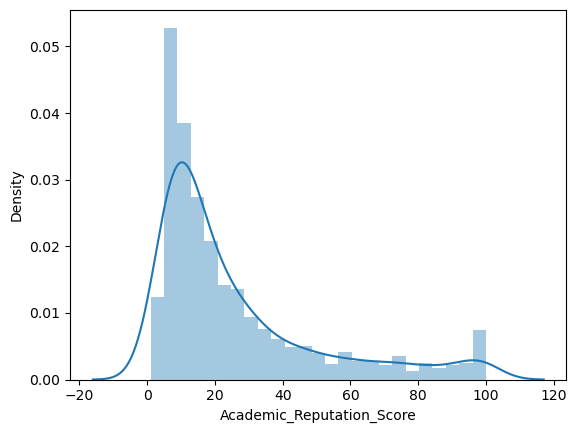

In [11]:
plt.show()

###### I don't know why the above graph didn't show without being specifically called

#### I don't believe the outliers should be removed  here, as I don't believe they are true outliers, but the result of the fact that there is a concentration of high (near 100) Academic Reputation Scores, as well as an abundance of much lower ones.  

In [12]:
# Check the mean
df['Academic_Reputation_Score'].mean()

np.float64(25.785942704863423)

In [13]:
# Check the median
df['Academic_Reputation_Score'].median()

16.0

In [14]:
# Check the max
df['Academic_Reputation_Score'].max()

100.0

### 3. Data prep for regression analysis

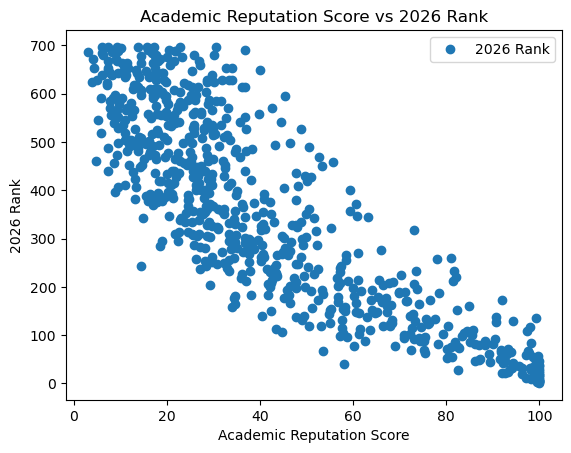

In [15]:
# Create a scatterplot for another look at how the variables plot against each other. 

# First, ensuring 2026 Rank column is numeric
df['2026 Rank'] = pd.to_numeric(df['2026 Rank'], errors ='coerce')

# Dropping NaN values
df_2 = df.dropna(subset=['2026 Rank'])

df.plot(x = 'Academic_Reputation_Score', y = '2026 Rank', style='o')
plt.title('Academic Reputation Score vs 2026 Rank')
plt.xlabel('Academic Reputation Score')
plt.ylabel('2026 Rank')
plt.show()

###  Hypothesis: The higher an institutions Academic Reputation Score, they lower/better it will rank (i.e. closer to #1).

In [16]:
# Reshape the variables into NumPy arrays

X = df_2['Academic_Reputation_Score'].values.reshape(-1,1)
y = df_2['2026 Rank'].values.reshape(-1,1)

In [17]:
X

array([[100. ],
       [ 99.6],
       [100. ],
       [100. ],
       [100. ],
       [100. ],
       [ 99.7],
       [ 99.9],
       [ 99.9],
       [ 98.3],
       [ 99.3],
       [ 97.1],
       [ 99.8],
       [ 99.9],
       [ 98.9],
       [ 99.5],
       [ 99.9],
       [100. ],
       [ 99.7],
       [ 96.3],
       [100. ],
       [ 92.7],
       [ 92. ],
       [ 93.2],
       [100. ],
       [ 98.9],
       [ 98.1],
       [ 82.6],
       [100. ],
       [ 93.7],
       [ 96.2],
       [ 97.9],
       [ 94.2],
       [ 99.6],
       [ 98.6],
       [ 95.7],
       [100. ],
       [ 99.9],
       [ 99.7],
       [ 99.6],
       [ 58.1],
       [ 92.2],
       [ 94.3],
       [ 89.4],
       [ 99.3],
       [100. ],
       [ 86.2],
       [ 92.7],
       [ 87. ],
       [ 91.6],
       [ 87.3],
       [ 80.1],
       [ 92.5],
       [ 81.2],
       [ 98.6],
       [ 80.6],
       [ 99.7],
       [ 97.1],
       [ 92.3],
       [ 93. ],
       [ 89.2],
       [ 92.9],
       [

In [18]:
y

array([[  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 17.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 22.],
       [ 24.],
       [ 25.],
       [ 25.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 32.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 36.],
       [ 38.],
       [ 38.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 42.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 47.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 58.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 63.],
       [ 65.],
       [ 66.],
       [ 6

In [19]:
# Split data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [20]:
# Create a regression object

regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

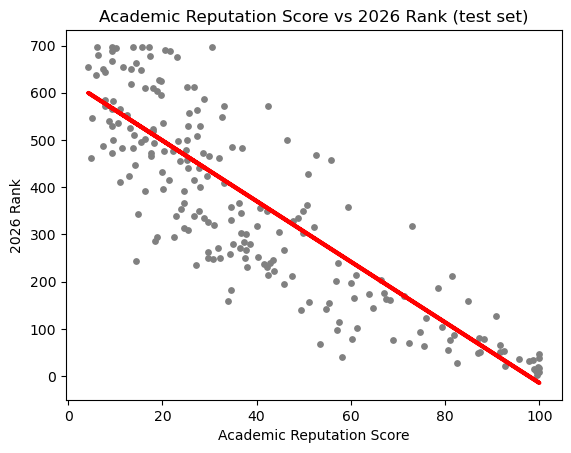

In [23]:
# Create a plot that shows the regression line from the model to the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Academic Reputation Score vs 2026 Rank (test set)')
plot_test.xlabel('Academic Reputation Score')
plot_test.ylabel('2026 Rank')
plot_test.show()

#### Although the regression line shows the general trend, there aren't many data points that fall directly on the line, leading me to believe that it's not very accurate. 

In [24]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [25]:
# Print the model summary statistics to evaluate the performance of the model. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.41623623]]
Mean squared error:  11491.01923163221
R2 score:  0.7171198218407225


In [26]:
y_predicted

array([[571.9104996 ],
       [484.00806331],
       [417.27920656],
       [505.82326648],
       [511.59787908],
       [ -7.47563159],
       [ -1.05939537],
       [469.25071999],
       [158.70488666],
       [523.14710429],
       [365.94931675],
       [465.40097826],
       [393.53913253],
       [503.25677199],
       [538.54607123],
       [594.3673264 ],
       [-13.89186782],
       [ 68.23595587],
       [480.7999452 ],
       [254.30680642],
       [258.15654816],
       [360.81632777],
       [355.68333879],
       [408.93809947],
       [521.86385704],
       [463.47610739],
       [483.36643969],
       [522.50548067],
       [443.58577509],
       [555.86990904],
       [275.48038597],
       [567.41913425],
       [-11.96699695],
       [497.48215938],
       [299.86208363],
       [511.59787908],
       [369.79905849],
       [235.69972137],
       [106.73337323],
       [500.6902775 ],
       [566.77751062],
       [451.28525856],
       [104.16687874],
       [514

In [27]:
# Create a dataframe comparing actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,540.0,571.910500
1,477.0,484.008063
2,549.0,417.279207
3,604.0,505.823266
4,519.0,511.597879
5,15.0,-7.475632
6,32.0,-1.059395
7,367.0,469.250720
8,317.0,158.704887
9,503.0,523.147104


### The model did not perform particularly well. The MSE of 11491 reflects a large difference between the regression line and the data points. Additionally, the R2 Score of 0.717 (72%) indicates a mediocre fit. 

#### **This is where the task instructions ended, but I continued on with the rest of what was discussed in the reading and shown in the example because it is valuable learning and practice.**

#### Compare how the regression fits the trainig set

In [28]:
# Predict

y_predicted_train = regression.predict(X_train)

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.41623623]]
Mean squared error:  10943.459743687792
R2 score:  0.7339778393316424


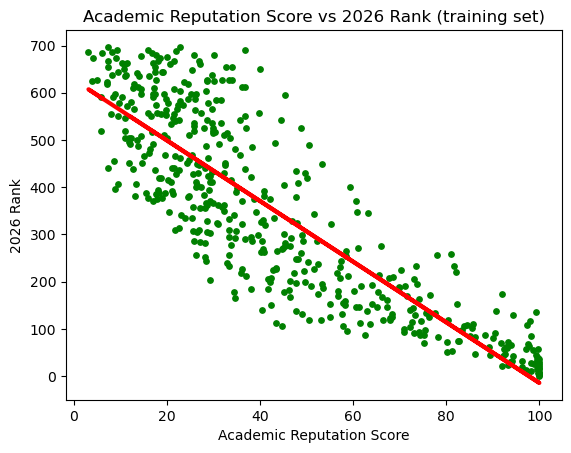

In [31]:
# Visualing training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Academic Reputation Score vs 2026 Rank (training set)')
plot_test.xlabel('Academic Reputation Score')
plot_test.ylabel('2026 Rank')
plot_test.show()